## Project Objective
This project aims to answer where and how the operators of a men's fashion company should focus their efforts to optimize revenue.

---

## Analysis Breakdown

### Section 1: Channel Performance Analysis
- **1.1** Channel Profitability Overview
- **1.2** Customer Acquisition Cost Analysis: Paid Search and Affiliates
- **1.3** Channel ROI Analysis: Paid Search and Affiliates

### Section 2: Demographic Analysis
- **2.1** Age Group Profit Analysis
- **2.2** Gender Analysis
- **2.3** Geographical Profitability Analysis

### Section 3: Customer Behaviour Analysis
- **3.1** Return on Promotions: Net Profit and Age Group
- **3.2** Seasonality Analysis of Registration Date
- **3.3** Contact Consent Analysis: Impact on Profits


In [1]:
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'E:/data task.xlsx'
sheet_names = pd.ExcelFile(file_path).sheet_names

print(file_path)
print(sheet_names)

E:/data task.xlsx
['Definitions', 'Cost', 'Value Info', 'Demo']


In [3]:
cost_df = pd.read_excel(file_path, header=0, sheet_name="Cost", index_col =0)
cost_df.head()

,Paid Search,Affiliates
Month,,
2013-01-01,41512.00,16421
2013-02-01,61243.00,42101
2013-03-01,84597.88,141321


In [4]:
demo_df = pd.read_excel(file_path, header=0, sheet_name='Demo', index_col=0)
demo_df.head()

,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Age,Age Group,Gender
Customer ID,,,,,,,,,
1,Mr,26844,Malahide,Y,2013-01-01 00:23:00,Organic Search,50,46-55,Male
2,Mr,30888,Dublin,Y,2013-01-01 00:30:00,Affiliates,39,36-45,Male
3,Mr,33359,Dublin,Y,2013-01-01 01:09:00,Paid Social,32,26-35,Male
4,Mr,31746,Dublin,N,2013-01-01 01:19:00,Affiliates,36,36-45,Male
5,Mr,33513,Limerick,Y,2013-01-01 01:58:00,Paid Search,31,26-35,Male


In [5]:
value_df = pd.read_excel(file_path, header=0, sheet_name='Value Info', index_col=0)
value_df.head()

,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit,Net Profit,Average Order Value
Customer ID,,,,,,,
1,8.97261,5.30772,1,6.600000,14.28033,7.680330,3.840165
2,7.92288,70.15680,7,6.639453,78.07968,71.440227,8.930028
3,14.06160,50.80320,7,0.000000,64.86480,64.864800,8.108100
4,14.07672,0.00000,0,0.000000,14.07672,14.076720,14.076720
5,22.68000,68.22144,9,14.771948,90.90144,76.129492,7.612949


---

# Section 1: Channel Performance Analysis

In [6]:
merged_df = pd.merge(demo_df, value_df, on='Customer ID', how='left')
merged_df = merged_df.reset_index()

In [7]:
merged_df.head()

,Customer ID,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Age,Age Group,Gender,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit,Net Profit,Average Order Value
0,1,Mr,26844,Malahide,Y,2013-01-01 00:23:00,Organic Search,50,46-55,Male,8.97261,5.30772,1.0,6.600000,14.28033,7.680330,3.840165
1,2,Mr,30888,Dublin,Y,2013-01-01 00:30:00,Affiliates,39,36-45,Male,7.92288,70.15680,7.0,6.639453,78.07968,71.440227,8.930028
2,3,Mr,33359,Dublin,Y,2013-01-01 01:09:00,Paid Social,32,26-35,Male,14.06160,50.80320,7.0,0.000000,64.86480,64.864800,8.108100
3,4,Mr,31746,Dublin,N,2013-01-01 01:19:00,Affiliates,36,36-45,Male,14.07672,0.00000,0.0,0.000000,14.07672,14.076720,14.076720
4,5,Mr,33513,Limerick,Y,2013-01-01 01:58:00,Paid Search,31,26-35,Male,22.68000,68.22144,9.0,14.771948,90.90144,76.129492,7.612949


In [8]:
channel_customers = merged_df.groupby('Source of Customer')['Customer ID'].count().reset_index(name='Customer Count')

In [9]:
print(channel_customers)

  Source of Customer  Customer Count
0         Affiliates            3868
1             Direct           11252
2     Organic Search            8392
3        Paid Search            6518
4        Paid Social            1411


In [10]:
channel_profit = merged_df.groupby('Source of Customer')['Net Profit'].sum().reset_index()
channel_orders = merged_df.groupby('Source of Customer')['Subsequent Orders Count'].sum().reset_index()

In [11]:
print(channel_profit)
print(channel_orders)

  Source of Customer     Net Profit
0         Affiliates  113546.591777
1             Direct  464783.828985
2     Organic Search  353182.223716
3        Paid Search  266156.914788
4        Paid Social   76182.755110
  Source of Customer  Subsequent Orders Count
0         Affiliates                  15789.0
1             Direct                  44067.0
2     Organic Search                  33339.0
3        Paid Search                  24905.0
4        Paid Social                   5919.0


In [12]:
channel_performance = pd.merge(channel_orders, channel_profit, on='Source of Customer')

channel_performance['AOV'] = channel_performance['Net Profit'] / (channel_performance['Subsequent Orders Count'] + 1)

print(channel_performance)

  Source of Customer  Subsequent Orders Count     Net Profit        AOV
0         Affiliates                  15789.0  113546.591777   7.191044
1             Direct                  44067.0  464783.828985  10.546969
2     Organic Search                  33339.0  353182.223716  10.593348
3        Paid Search                  24905.0  266156.914788  10.686458
4        Paid Social                   5919.0   76182.755110  12.868709


### 1.1 Channel Profitability Overview

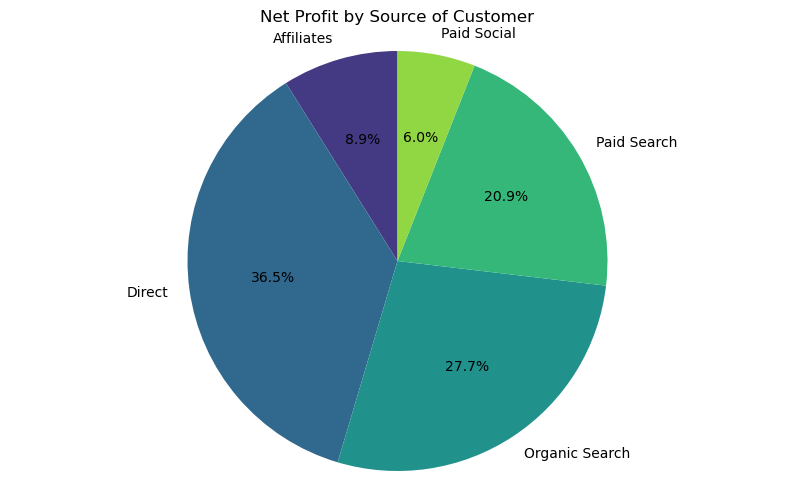

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(channel_performance['Net Profit'], labels=channel_performance['Source of Customer'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(channel_performance)))
ax.axis('equal')  

plt.title('Net Profit by Source of Customer')
plt.show()

### 1.2  Customer Acquisition Cost Analysis: Paid Search and Affiliates

In [14]:
total_cost = cost_df.sum().reset_index()
total_cost.columns = ['Source of Customer', 'Total Cost']

In [15]:
print(total_cost)

  Source of Customer  Total Cost
0        Paid Search   187352.88
1         Affiliates   199843.00


In [16]:
cac_df = pd.merge(total_cost, channel_customers, on='Source of Customer')

cac_df['CAC'] = cac_df['Total Cost'] / cac_df['Customer Count']

print(cac_df[['Source of Customer', 'CAC']])

  Source of Customer        CAC
0        Paid Search  28.743921
1         Affiliates  51.665719


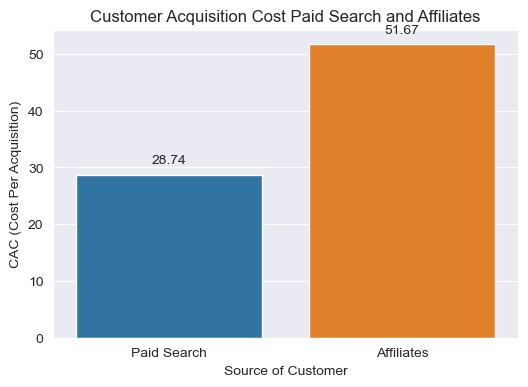

In [17]:
sns.set_style("darkgrid")

plt.figure(figsize=(6, 4))

ax = sns.barplot(x='Source of Customer', y='CAC', data=cac_df)
plt.title('Customer Acquisition Cost Paid Search and Affiliates')
plt.ylabel('CAC (Cost Per Acquisition)')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### 1.3 Channel ROI Analysis: Paid Search and Affiliates

In [18]:
# Calculate the total cost for 'Paid Search' and 'Affiliates'
total_cost = cost_df[['Paid Search', 'Affiliates']].sum().reset_index()
total_cost.columns = ['Source of Customer', 'Total Cost']

In [19]:
print(total_cost)

  Source of Customer  Total Cost
0        Paid Search   187352.88
1         Affiliates   199843.00


In [20]:
channel_performance = pd.merge(channel_performance, total_cost, on='Source of Customer', how='right')

selected_channels = channel_performance[channel_performance['Source of Customer'].isin(['Paid Search', 'Affiliates'])]

# Calculate the ROI 
selected_channels['ROI'] = ((selected_channels['Net Profit'] - selected_channels['Total Cost']) / selected_channels['Total Cost']) * 100

print(selected_channels[['Source of Customer', 'ROI']])

  Source of Customer        ROI
0        Paid Search  42.061822
1         Affiliates -43.182102


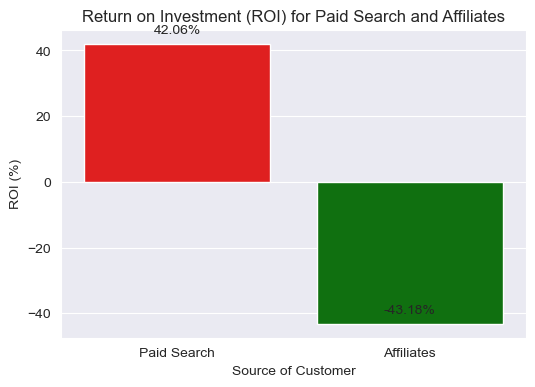

In [21]:
sns.set_style("darkgrid")

plt.figure(figsize=(6, 4))

palette = {'Paid Search': 'r', 'Affiliates': 'g'}

ax = sns.barplot(x='Source of Customer', y='ROI', data=selected_channels, palette=palette)
plt.title('Return on Investment (ROI) for Paid Search and Affiliates')
plt.ylabel('ROI (%)')
 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

---

# Section 2： Demographic Analysis

### 2.1 Age Group Profit Analysis

In [22]:
age_distribution = merged_df.groupby('Age Group')['Customer ID'].count().reset_index(name='Number of Customers')
print(age_distribution)


  Age Group  Number of Customers
0     26-35                 6036
1     36-45                13609
2     46-55                 6899
3       56+                 4897


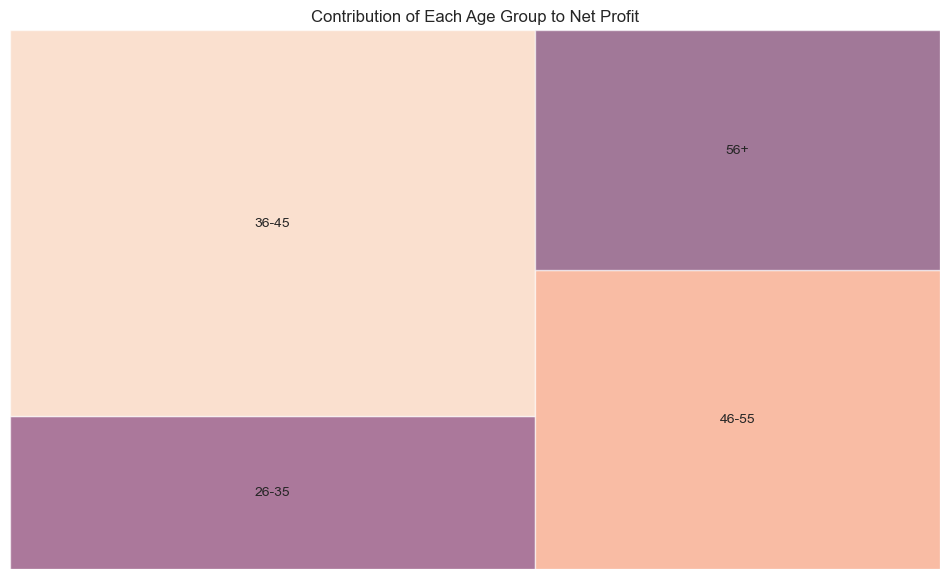

In [23]:
import squarify

age_group_profit = merged_df.groupby('Age Group')['Net Profit'].sum().reset_index()

plt.figure(figsize=(12, 7))
squarify.plot(sizes=age_group_profit['Net Profit'], label=age_group_profit['Age Group'], alpha=0.6)
plt.title('Contribution of Each Age Group to Net Profit')
plt.axis('off')
plt.show()

### 2.2 Gender Analysis

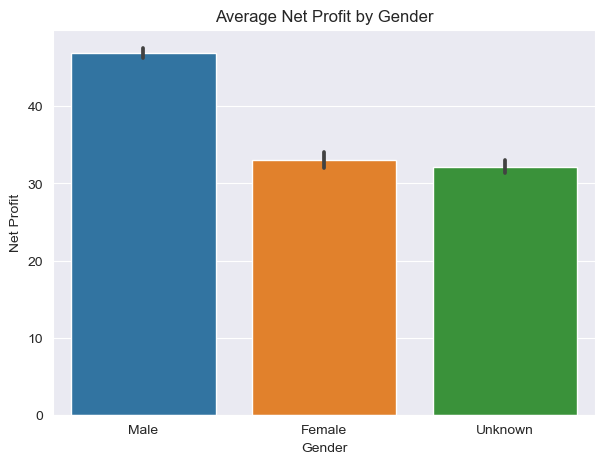

In [24]:
plt.figure(figsize=(7, 5))
sns.barplot(data=merged_df, x='Gender', y='Net Profit')
plt.title('Average Net Profit by Gender')
plt.show()

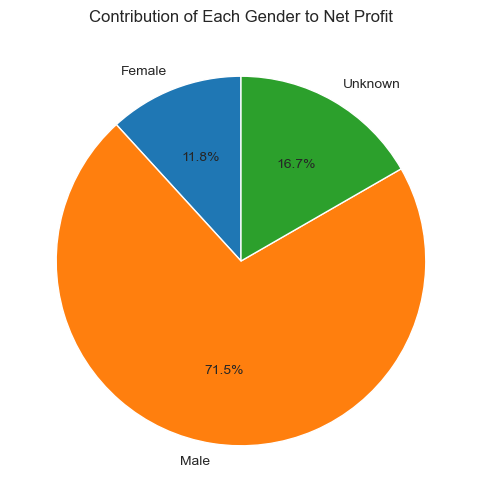

In [25]:
gender_profit = merged_df.groupby('Gender')['Net Profit'].sum()

plt.figure(figsize=(10, 6))
gender_profit.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Contribution of Each Gender to Net Profit')
plt.ylabel('')  # Hide the 'Adjusted Profit' ylabel for clarity
plt.show()

### 2.3 Geographical Profitability Analysis

In [26]:
customer_counts = merged_df['Address City'].value_counts()

print("Number of Customers per City (Top 5):")
print(customer_counts.head(5))

Number of Customers per City (Top 5):
Dublin       21753
Cork          1073
Galway         661
Limerick       633
Waterford      392
Name: Address City, dtype: int64


In [27]:
profit_by_city = merged_df.groupby('Address City')['Net Profit'].sum().sort_values(ascending=False).reset_index()
profit_by_city.index = profit_by_city.index + 1

print("Total Net Profit per City(Top 5):")
print(profit_by_city.head(5))

Total Net Profit per City(Top 5):
  Address City     Net Profit
1       Dublin  877199.313715
2         Cork   46375.608664
3       Galway   25338.244958
4     Limerick   25054.469908
5    Waterford   15596.235228


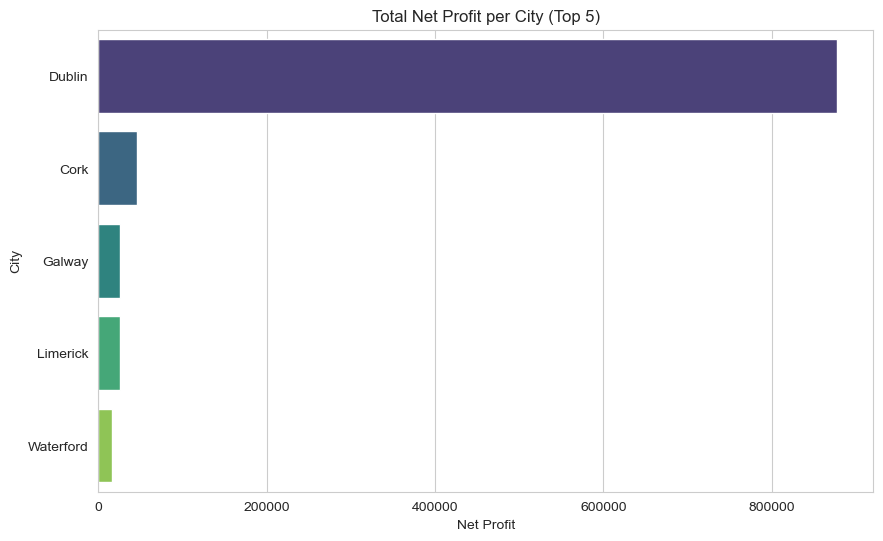

In [28]:
# Filter the top 5 cities by net profit
top_5_cities = profit_by_city.head(5)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(data=top_5_cities, y='Address City', x='Net Profit', palette='viridis')

plt.title('Total Net Profit per City (Top 5)')
plt.xlabel('Net Profit')
plt.ylabel('City')

plt.show()

---

# Section 3: Customer Behaviour Analysis

### 3.1 Return on Promotions: Net Profit and Age Group

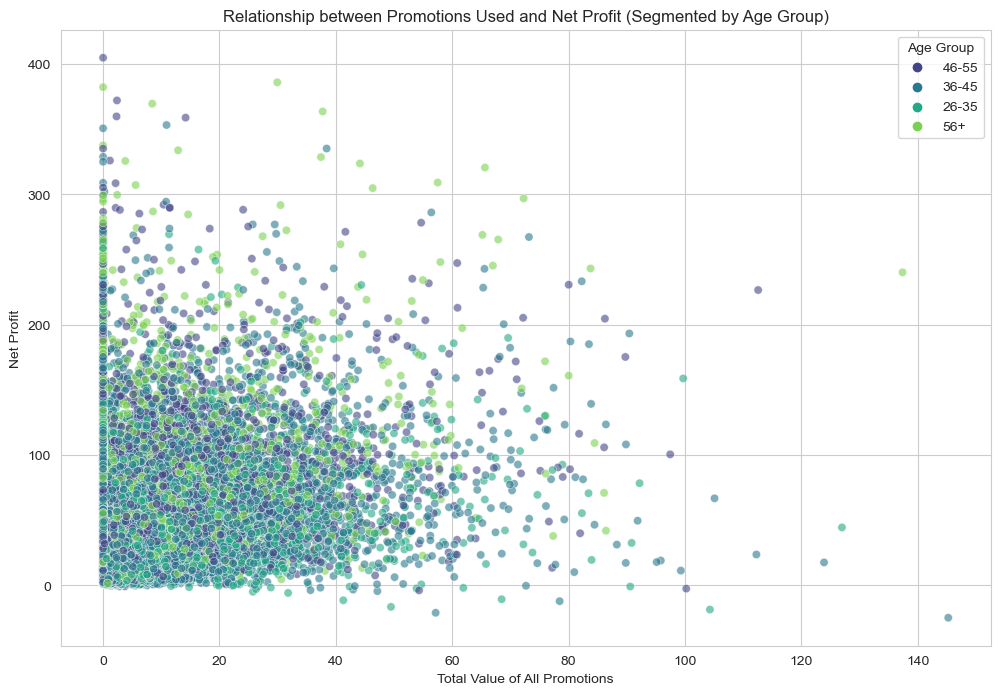

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=merged_df, x='Total value of all promotions', y='Net Profit', hue='Age Group', palette='viridis', alpha=0.6)
plt.title('Relationship between Promotions Used and Net Profit (Segmented by Age Group)')
plt.xlabel('Total Value of All Promotions')
plt.ylabel('Net Profit')
plt.legend(title='Age Group')
plt.show()

In [30]:
correlation = merged_df['Total value of all promotions'].corr(merged_df['Net Profit'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

Pearson Correlation Coefficient: 0.29


### 3.2 Seasonality Analysis of Registration Date

In [31]:
# Extract month
merged_df['Registration Month'] = merged_df['Registration Date'].dt.month

In [32]:
profit_by_month = merged_df.groupby('Registration Month').agg({
    '1st Order Profit': 'sum',
    'Subsequent Order Profit': 'sum'
}).reset_index()


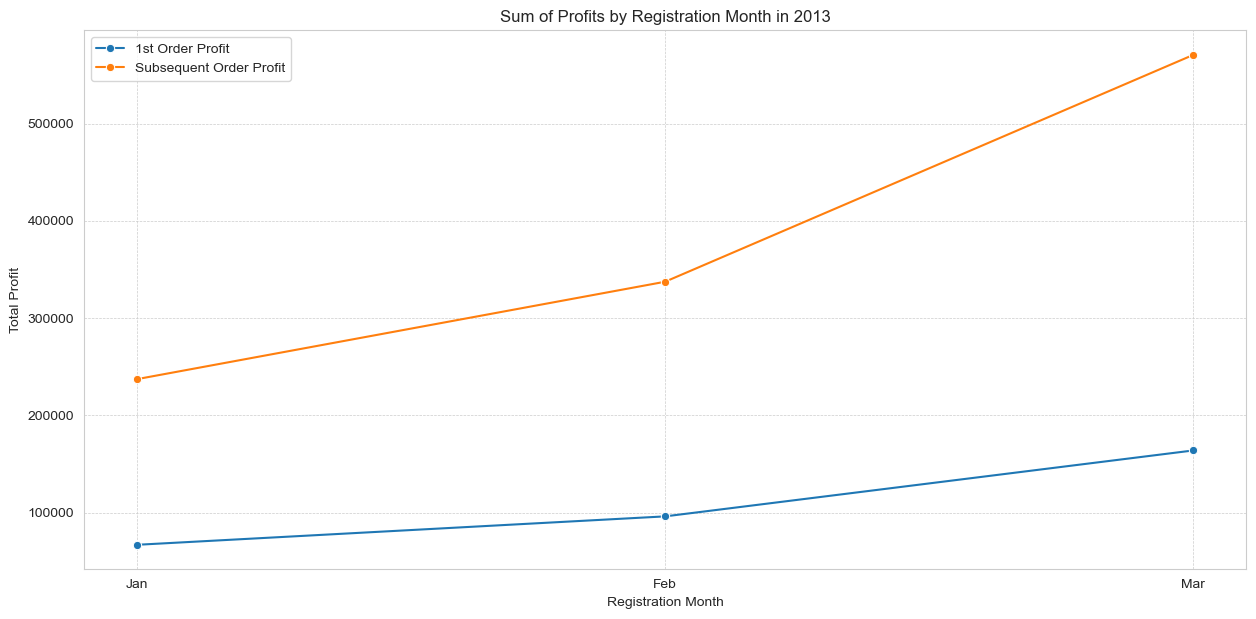

In [33]:
plt.figure(figsize=(15,7))

sns.lineplot(data=profit_by_month, x='Registration Month', y='1st Order Profit', marker='o', label='1st Order Profit')
sns.lineplot(data=profit_by_month, x='Registration Month', y='Subsequent Order Profit', marker='o', label='Subsequent Order Profit')

plt.title('Sum of Profits by Registration Month in 2013')
plt.ylabel('Total Profit')
plt.xlabel('Registration Month')
plt.xticks(ticks=range(1, 4), labels=['Jan', 'Feb', 'Mar'])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### 3.3 Contact Consent Analysis: Impact on Profits

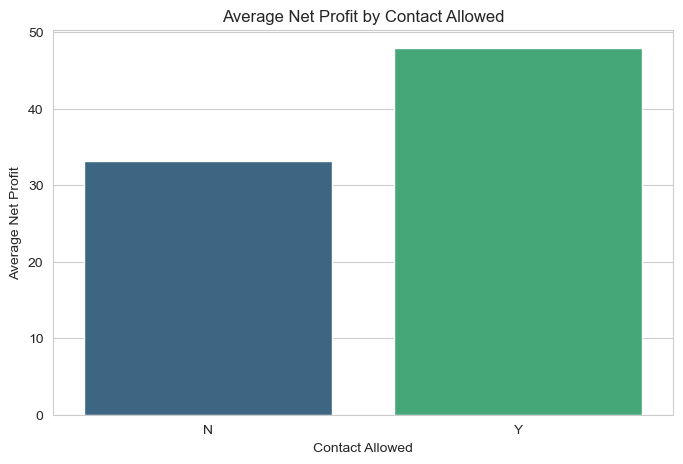

In [34]:
avg_profit_by_contact = merged_df.groupby('Contact Allowed')['Net Profit'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x='Contact Allowed', y='Net Profit', data=avg_profit_by_contact, palette='viridis')
plt.title('Average Net Profit by Contact Allowed')
plt.ylabel('Average Net Profit')
plt.show()